# Students' Home Institutions Map

## Imports

In [22]:
from collections import Counter
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Define Data and Visualize Output

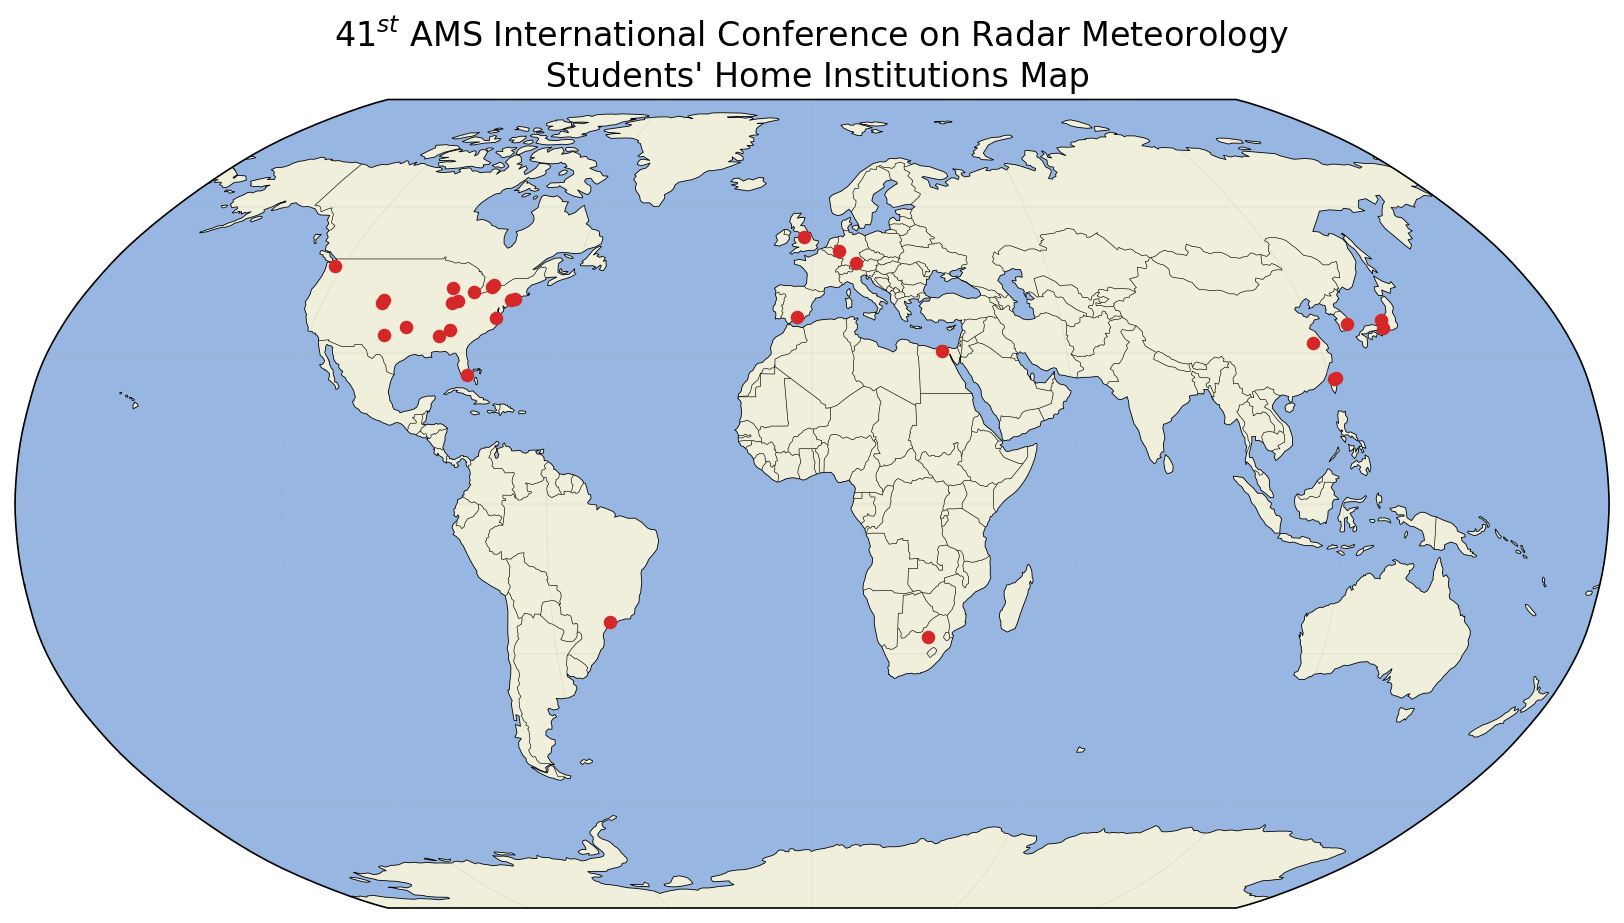

In [19]:
raw_institutions = [
    "University of Oklahoma","University of Colorado Boulder",
    "Institute for Space-Earth Environmental Research, Nagoya University",
    "Univ. of Oklahoma","University of Illinois at Urbana-Champaign",
    "University of Illinois Urbana-Champaign",
    "University of Oklahoma, School of Electrical and Computer Engineering",
    "University of Washington",
    "Center for Atmospheric REmote sensing (CARE), Kyungpook National University, Republic of Korea",
    "Univ. of Wisconsin","Texas Tech University","University of Oklahoma",
    "School of Electrical and Computer Engineering","German Aerospace Center (DLR e.V.)",
    "National Central University","Purdue University","Colorado State University",
    "University of Illinois at Urbana-Champaign","The University of Alabama in Huntsville",
    "Colorado State University","Stony Brook University","Purdue University",
    "The University of Alabama in Huntsville",
    "Institute of Environmental Research and Studies, Sadat University",
    "IISTA-CEAMA","University of Colorado Boulder","Univ. of Colorado",
    "Univ. of Illinois at Urbana-Champaign","Toyama Prefectural University",
    "University of Sao Paulo","University of Michigan","Advanced Radar Research Center, University of Oklahoma",
    "Nanjing University","RSMAS","Nanjing University","University of Bonn","The University of Oklahoma",
    "Colorado State University","Univ. of Oklahoma","National Centre for Atmospheric Science, UK",
    "Nanjing University","Colorado State University","Univ. of Oklahoma","The University of Oklahoma",
    "Hampton University","Mcmaster University","York University","Univ. of Oklahoma","Univ. of Oklahoma",
    "Central Weather Administration","University of Oklahoma","Colorado State University",
    "Stevens Institute of Technology","Mississippi State Univ.","North-West Univ.",
    "The University of Oklahoma","Univ. of Oklahoma","OU/CIWRO",
]

normalize = {
    "university of oklahoma": "University of Oklahoma",
    "the university of oklahoma": "University of Oklahoma",
    "univ. of oklahoma": "University of Oklahoma",
    "advanced radar research center, university of oklahoma": "University of Oklahoma",
    "ou/ciwro": "University of Oklahoma",
    "university of oklahoma, school of electrical and computer engineering": "University of Oklahoma",

    "university of colorado boulder": "University of Colorado Boulder",
    "univ. of colorado": "University of Colorado Boulder",

    "university of illinois at urbana-champaign": "University of Illinois at Urbana-Champaign",
    "university of illinois urbana-champaign": "University of Illinois at Urbana-Champaign",
    "univ. of illinois at urbana-champaign": "University of Illinois at Urbana-Champaign",

    "univ. of wisconsin": "University of Wisconsin",
    "the university of alabama in huntsville": "University of Alabama in Huntsville",
    "german aerospace center (dlr e.v.)": "German Aerospace Center (DLR)",
    "mississippi state univ.": "Mississippi State University",
    "north-west univ.": "North-West University",
    "mcmaster university": "McMaster University",
    "national centre for atmospheric science, uk": "NCAS (UK)",
    "institute for space-earth environmental research, nagoya university": "Nagoya University (ISEE)",
    "center for atmospheric remote sensing (care), kyungpook national university, republic of korea": "Kyungpook National University (CARE)",
    "national central university": "National Central University (Taiwan)",
    "institute of environmental research and studies, sadat university": "Sadat University (Egypt)",
    "iista-ceama": "IISTA-CEAMA (Spain)",
    "toyama prefectural university": "Toyama Prefectural University",
    "university of sao paulo": "University of Sao Paulo",
    "rsmas": "RSMAS (University of Miami)",
    "central weather administration": "Central Weather Administration (Taiwan)",
    "school of electrical and computer engineering": None,
}

def canonicalize(name: str):
    key = name.strip().lower()
    return normalize.get(key, name.strip())

canon = [c for c in (canonicalize(n) for n in raw_institutions) if c]
counts = Counter(canon)

coords = {
    "University of Oklahoma": (35.2059, -97.4457),
    "University of Colorado Boulder": (40.0076, -105.2659),
    "Nagoya University (ISEE)": (35.154, 136.968),
    "University of Illinois at Urbana-Champaign": (40.1019, -88.2272),
    "University of Washington": (47.6553, -122.3035),
    "Kyungpook National University (CARE)": (35.8886, 128.6105),
    "University of Wisconsin": (43.0766, -89.4125),
    "Texas Tech University": (33.5843, -101.8783),
    "German Aerospace Center (DLR)": (48.0826, 11.2790),
    "National Central University (Taiwan)": (24.968, 121.195),
    "Purdue University": (40.4237, -86.9212),
    "Colorado State University": (40.5762, -105.0809),
    "University of Alabama in Huntsville": (34.7254, -86.6404),
    "Stony Brook University": (40.912, -73.123),
    "Sadat University (Egypt)": (30.4256, 30.5406),
    "IISTA-CEAMA (Spain)": (37.1773, -3.5986),
    "Toyama Prefectural University": (36.702, 137.213),
    "University of Sao Paulo": (-23.561, -46.730),
    "University of Michigan": (42.278, -83.738),
    "Nanjing University": (32.057, 118.778),
    "University of Bonn": (50.732, 7.101),
    "NCAS (UK)": (53.4668, -2.2339),
    "Hampton University": (37.021, -76.337),
    "McMaster University": (43.2609, -79.9192),
    "York University": (43.7735, -79.5019),
    "Central Weather Administration (Taiwan)": (25.037, 121.563),
    "Stevens Institute of Technology": (40.744, -74.025),
    "Mississippi State University": (33.455, -88.794),
    "North-West University": (-26.678, 27.094),
    "RSMAS (University of Miami)": (25.731, -80.162),
}

lats, lons, sizes, labels = [], [], [], []
for inst, cnt in counts.items():
    if inst in coords:
        lat, lon = coords[inst]
        lats.append(lat); lons.append(lon)
        sizes.append(20 + 20 * (cnt ** 0.8))
        labels.append((inst, cnt))

proj = ccrs.Robinson()
fig = plt.figure(figsize=(14,7), dpi=150)
ax = plt.axes(projection=proj)

ax.add_feature(cfeature.LAND, zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.4, zorder=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.3, zorder=1)
ax.gridlines(draw_labels=False, linewidth=0.2, alpha=0.5)
ax.set_global()

ax.scatter(lons, lats, s=30, color='tab:red', transform=ccrs.PlateCarree(), zorder=2)

#for (lat, lon, (inst, cnt)) in zip(lats, lons, labels):
#    if cnt >= 3:
#        ax.text(lon + 3, lat + 2, f"{inst} ({cnt})", transform=ccrs.PlateCarree(), fontsize=7, zorder=3)

ax.set_title(r"$41^{st}$ AMS International Conference on Radar Meteorology" + " \n Students' Home Institutions Map", fontsize=16)
plt.savefig("students-map.png", bbox_inches="tight", dpi=300)
plt.show()


Compute number of institutions

In [20]:
len(coords.keys())

30